# Experiment 2

In [1]:
import pandas as pd
import numpy as np

import quantstats as qs
from tinycta.portfolio import build_portfolio


In [2]:
# Load prices
prices = pd.read_csv("data/p_hashed.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [3]:
# take two moving averages and apply the sign-function, adjust by volatility
def f(price, fast=32, slow=96, volatility=32):
    s = price.ewm(com=slow, min_periods=300).mean()
    f = price.ewm(com=fast, min_periods=300).mean()
    std = price.pct_change().ewm(com=volatility, min_periods=300).std()
    return np.sign(f-s)/std

In [4]:
from ipywidgets import Label, HBox, VBox, IntSlider

fast = IntSlider(min=4, max=192, step=4, value=32)
slow = IntSlider(min=4, max=192, step=4, value=96)
vola = IntSlider(min=4, max=192, step=4, value=32)
left_box = VBox([Label("Fast Moving Average"), Label("Slow Moving Average"), Label("Volatility")])
right_box = VBox([fast, slow, vola])
HBox([left_box, right_box])

In [5]:
portfolio = build_portfolio(prices=prices, position=prices.apply(f, fast=fast.value, slow=slow.value, volatility=vola.value))

                    Strategy
------------------  ----------
Start Period        1990-01-02
End Period          2023-04-14
Risk-Free Rate      0.0%
Time in Market      96.0%

Cumulative Return   83.17%
CAGR﹪              1.83%

Sharpe              0.83
Prob. Sharpe Ratio  100.0%
Sortino             1.18
Sortino/√2          0.83
Omega               1.16

Max Drawdown        -7.16%
Longest DD Days     1597

Gain/Pain Ratio     0.16
Gain/Pain (1M)      0.9

Payoff Ratio        1.0
Profit Factor       1.16
Common Sense Ratio  1.19
CPC Index           0.62
Tail Ratio          1.03
Outlier Win Ratio   3.78
Outlier Loss Ratio  3.73

MTD                 0.27%
3M                  0.3%
6M                  -0.82%
YTD                 0.39%
1Y                  1.12%
3Y (ann.)           1.86%
5Y (ann.)           0.47%
10Y (ann.)          1.24%
All-time (ann.)     1.83%

Avg. Drawdown       -0.42%
Avg. Drawdown Days  37
Recovery Factor     11.62
Ulcer Index         0.02
Serenity Index      1.58


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


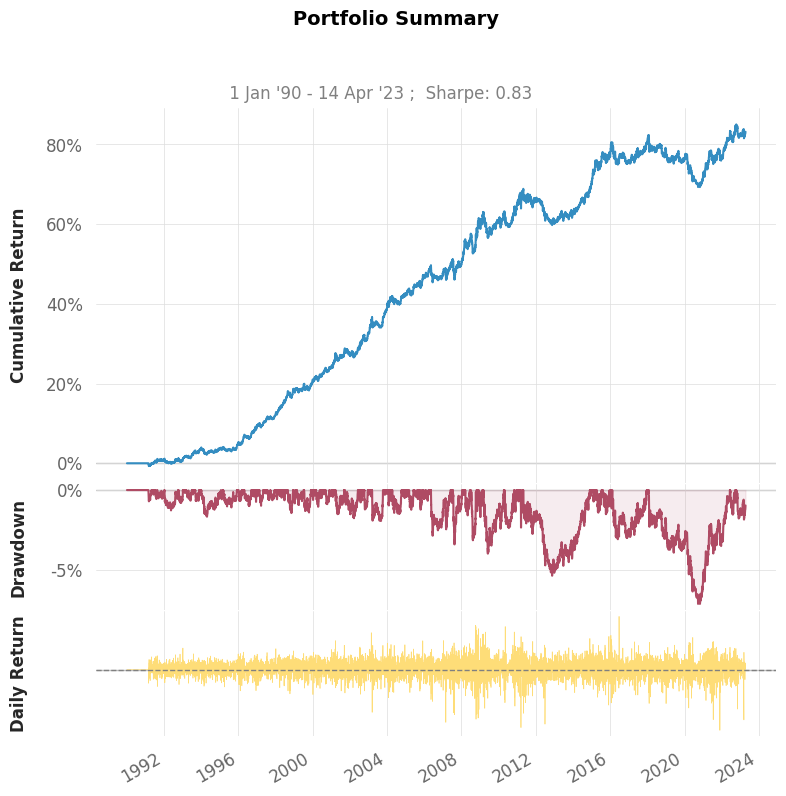

/home/thomas/projects/cs/.venv/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


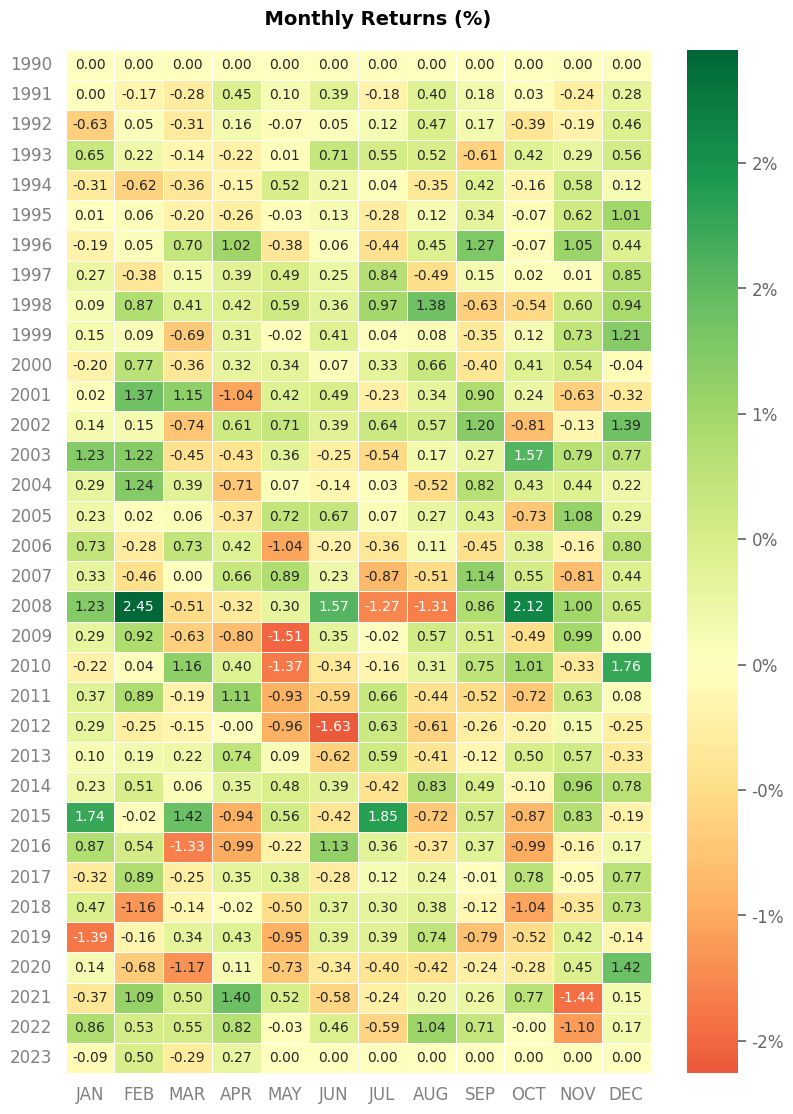

In [6]:
qs.reports.basic(portfolio.returns(init_capital=10000))

* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position
* Only 3 **free parameters** used here.
* Only 4 lines of code
* Scaling the bet-size by volatility has improved the situation.

Results do not look terrible but...
* No concept of risk integrated 

Often hedge funds outsource the risk management to some board or committee
and develop machinery for more systematic **parameter-hacking**.